# このNotebookの目的
- iris dataset の簡単なEDAを行う
- JupyterNotebookをなるべくキレイに管理する方法を知る

## 目的やデータを理解する
- (そもそものデータ分析の目的は何か？)
- 何のために集めたデータなのか？
- カラムの意味は？
- どういう値を持っているのか？
- どれだけのデータ量なのか？
- 欠損はあるのか？
- 異常な値はあるのか？
- などなど

## このNotebookからわかること
- 〇〇
- 〇〇

## あとで調べたいこと
- 〇〇
- 〇〇

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

## データの読み込み

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [3]:
# データセットに付属している説明分の表示(sklearn.datasets 共通)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### どういうデータなのか？
- データ数: 150行
    - 150個の あやめ のデータがあるってこと
- あやめの種類は 3種類
    - 0: Setosa
    - 1: Versicolour
    - 2: Virginica
- 1つの花につき4つの数値データがある
    - sepal length (単位: cm)
    - sepal width  (単位: cm)
    - petal length  (単位: cm)
    - petal width  (単位: cm)


#### sepal と petal の意味
![](https://cdn.britannica.com/06/63306-004-0406576D/flower-part-purpose-seeds-making-insects-pollination.jpg)


## よくある基礎的な分析

In [4]:
# 集計操作をやりやすくするためにDFに変換する
df = pd.DataFrame(
    iris.data,
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

df['species'] = iris.target

# 数値だと品種がわかりにくいので学名を利用する
df['species'] = df['species'].map({
    0: 'Setosa',
    1: 'Versicolour',
    2: 'Virginica'
})

df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# 欠損の確認
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# 基本統計量(数値編)
df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

In [8]:
# 統計量(カテゴリデータ編)
df.describe(include='object')  # 'O' でもOK

species
count         150
unique          3
top     Virginica
freq           50

## カラムごとのデータを可視化しよう
- 統計量, 表, グラフなどをつかう

In [9]:
# 品種ごとのDFに分割しておく
df_setosa = df[df['species'] == 'Setosa']
df_versicolour = df[df['species'] == 'Versicolour']
df_virginica = df[df['species'] == 'Virginica']


### sepal_length


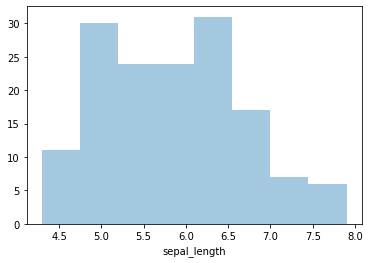

In [10]:
# 全体のヒストグラム
sns.distplot(df['sepal_length'], kde=False)

In [11]:
df['species'].unique()

array(['Setosa', 'Versicolour', 'Virginica'], dtype=object)

- 〇〇だった
- あるいは、☆☆なのでは？

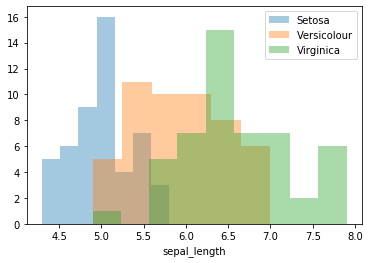

In [12]:
sns.distplot(df_setosa['sepal_length'], kde=False, label='Setosa')
sns.distplot(df_versicolour['sepal_length'], kde=False, label='Versicolour')
sns.distplot(df_virginica['sepal_length'], kde=False, label='Virginica')

plt.legend()

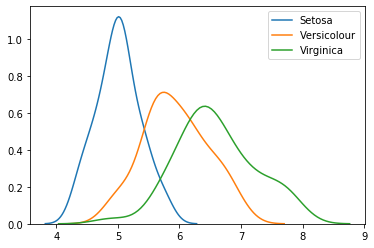

In [13]:
sns.kdeplot(df_setosa['sepal_length'], label='Setosa')
sns.kdeplot(df_versicolour['sepal_length'], label='Versicolour')
sns.kdeplot(df_virginica['sepal_length'], label='Virginica')

plt.legend()

### sepal_width

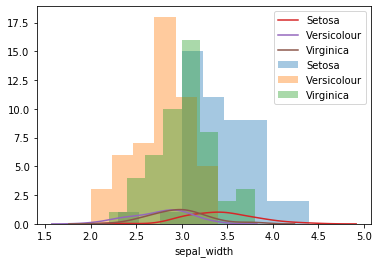

In [14]:
sns.distplot(df_setosa['sepal_width'], kde=False, label='Setosa')
sns.distplot(df_versicolour['sepal_width'], kde=False, label='Versicolour')
sns.distplot(df_virginica['sepal_width'], kde=False, label='Virginica')

plt.legend()

sns.kdeplot(df_setosa['sepal_width'], label='Setosa')
sns.kdeplot(df_versicolour['sepal_width'], label='Versicolour')
sns.kdeplot(df_virginica['sepal_width'], label='Virginica')

plt.legend()

### petal_length

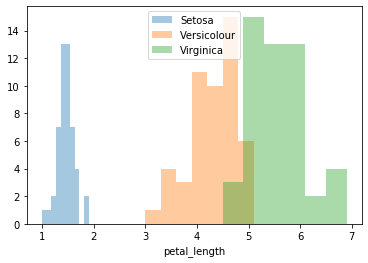

In [15]:
sns.distplot(df_setosa['petal_length'], kde=False, label='Setosa')
sns.distplot(df_versicolour['petal_length'], kde=False, label='Versicolour')
sns.distplot(df_virginica['petal_length'], kde=False, label='Virginica')

plt.legend()

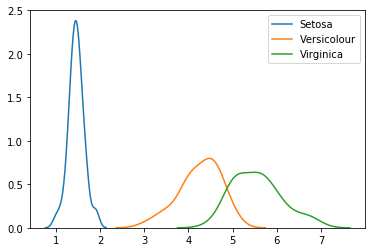

In [16]:
sns.kdeplot(df_setosa['petal_length'], label='Setosa')
sns.kdeplot(df_versicolour['petal_length'], label='Versicolour')
sns.kdeplot(df_virginica['petal_length'], label='Virginica')

plt.legend()

### petal_width

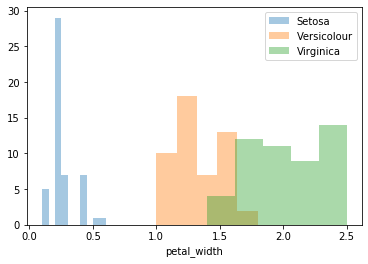

In [17]:
sns.distplot(df_setosa['petal_width'], kde=False, label='Setosa')
sns.distplot(df_versicolour['petal_width'], kde=False, label='Versicolour')
sns.distplot(df_virginica['petal_width'], kde=False, label='Virginica')

plt.legend()

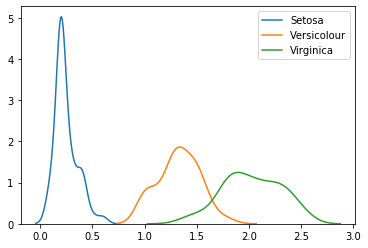

In [18]:
sns.kdeplot(df_setosa['petal_width'], label='Setosa')
sns.kdeplot(df_versicolour['petal_width'], label='Versicolour')
sns.kdeplot(df_virginica['petal_width'], label='Virginica')

plt.legend()

### speices

In [19]:
df['species'].value_counts()

Virginica      50
Setosa         50
Versicolour    50
Name: species, dtype: int64

In [20]:
df['species'].value_counts(normalize=True)

Virginica      0.333333
Setosa         0.333333
Versicolour    0.333333
Name: species, dtype: float64

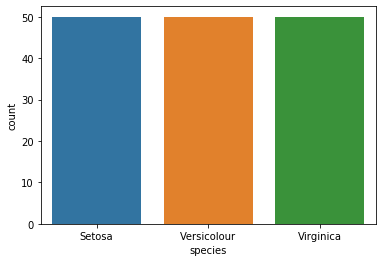

In [21]:
sns.countplot(df['species'])

## 複数のカラムの関係性をみる

### PairPlot

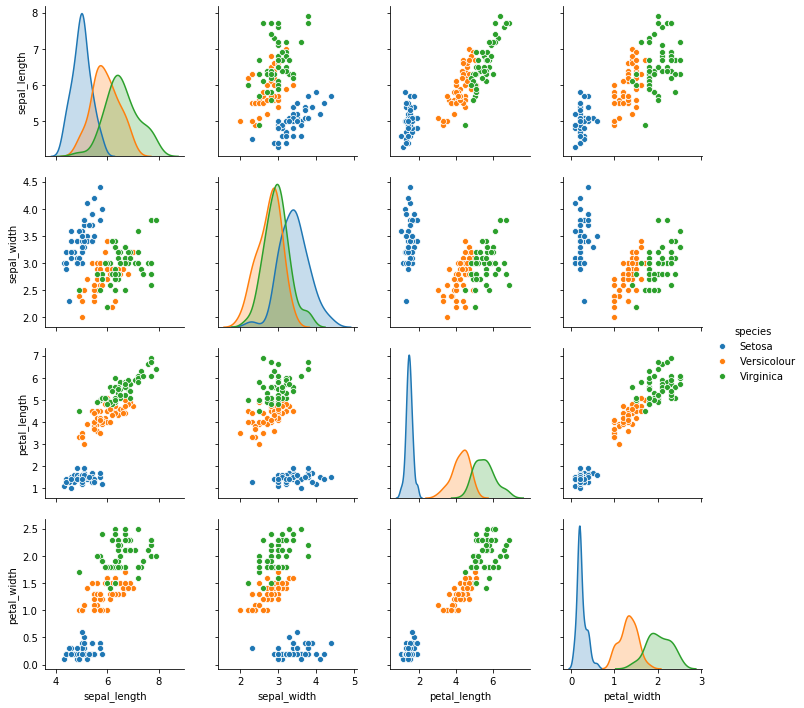

In [22]:
sns.pairplot(df, hue='species')

### ピアソンの相関係数
- 2つの変数の直線関係の強さを表す指標
    - 値域は [-1, +1]
- 参考: http://tomoshige-n.hatenablog.com/entry/2014/08/06/035001
- 参考: https://support.minitab.com/ja-jp/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/

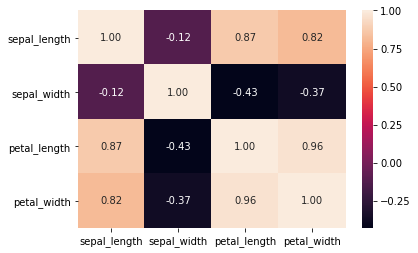

In [23]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

## pandas-profiling による俯瞰

In [24]:
import pandas_profiling

pandas_profiling.ProfileReport(df)

おわり